In [1]:
!pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable


In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
!pip install matplotlib

In [4]:
!pip install seaborn

In [3]:
training_set= tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
)

Found 70295 files belonging to 38 classes.


In [4]:
validation_set= tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    
)

Found 17572 files belonging to 38 classes.


In [5]:
training_set

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>

In [6]:
for x,y in training_set:
    print(x,x.shape)
    print(y,y.shape)
    break

tf.Tensor(
[[[[ 84.5  133.5  111.5 ]
   [ 85.75 134.75 112.75]
   [ 94.25 143.25 121.25]
   ...
   [ 91.25 141.25 112.25]
   [ 84.   134.   105.  ]
   [ 87.75 137.75 108.75]]

  [[ 84.75 134.75 109.75]
   [ 83.75 133.75 108.75]
   [ 80.75 130.75 105.75]
   ...
   [ 98.   148.   119.  ]
   [ 92.75 142.75 113.75]
   [ 87.25 137.25 108.25]]

  [[ 85.25 135.25 110.25]
   [ 86.   136.   111.  ]
   [ 81.25 131.25 106.25]
   ...
   [ 94.25 144.25 115.25]
   [ 92.   142.   113.  ]
   [ 90.   140.   111.  ]]

  ...

  [[103.   161.5   99.5 ]
   [101.   159.75  96.  ]
   [ 99.5  158.5   94.  ]
   ...
   [123.5  176.5  124.5 ]
   [123.   175.   126.  ]
   [126.5  178.5  129.5 ]]

  [[117.5  177.   108.  ]
   [110.75 170.   101.5 ]
   [109.   168.   101.  ]
   ...
   [133.75 185.75 136.75]
   [129.75 181.75 132.75]
   [131.75 183.75 134.75]]

  [[111.75 173.75  99.75]
   [115.25 177.   104.75]
   [113.5  174.5  105.5 ]
   ...
   [135.   185.   136.  ]
   [135.5  185.5  136.5 ]
   [139.75 188.75 14

BUILDING MODEL

In [7]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten
from tensorflow.keras.models import Sequential

In [8]:
model = Sequential()

In [9]:
#building the convolution layer

In [11]:
model.add(Conv2D(filters=32, kernel_size=3, padding='same',activation='relu',input_shape=[128,128,3]))
model.add(Conv2D(filters=32, kernel_size=3, padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))

In [12]:
model.add(Conv2D(filters=64, kernel_size=3, padding='same',activation='relu',input_shape=[128,128,3]))
model.add(Conv2D(filters=64, kernel_size=3, padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))

In [13]:
model.add(Conv2D(filters=128, kernel_size=3, padding='same',activation='relu',input_shape=[128,128,3]))
model.add(Conv2D(filters=128, kernel_size=3, padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))

In [14]:
model.add(Conv2D(filters=256, kernel_size=3, padding='same',activation='relu',input_shape=[128,128,3]))
model.add(Conv2D(filters=256, kernel_size=3, padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))

In [15]:
model.add(Flatten())

In [16]:
model.add(Dense(units=1024,activation='relu'))

In [17]:
#Outout Layer
model.add(Dense(units=38,activation='softmax'))

Compiling MODEL

In [18]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [19]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 128, 128, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 64, 64, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 64, 64, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 32, 32, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 32, 32, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 16, 16, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 8, 8, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 8, 8, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1024)           │     4,195,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 38)             │        38,950 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,425,030 (20.69 MB)

 Trainable params: 5,425,030 (20.69 MB)

 Non-trainable params: 0 (0.00 B)

MODEL TRAINING

In [20]:
training_history= model.fit(x=training_set,validation_data=validation_set,epochs=1)

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1599s 723ms/step - accuracy: 0.4137 - loss: 2.0683 - val_accuracy: 0.8244 - val_loss: 0.5423


In [21]:
training_loss,training_accuracy = model.evaluate(training_set)

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 363s 165ms/step - accuracy: 0.8394 - loss: 0.5009


In [22]:
print(training_loss,training_accuracy)

0.4729466140270233 0.8478554487228394


In [23]:
training_loss,training_accuracy = model.evaluate(validation_set)

550/550 ━━━━━━━━━━━━━━━━━━━━ 92s 167ms/step - accuracy: 0.8238 - loss: 0.5447


In [24]:
print(training_loss,training_accuracy)

0.5423396825790405 0.824436604976654


In [26]:
model.save("trained_model.keras")

In [27]:
training_history.history

{'accuracy': [0.6186784505844116],
 'loss': [1.2738351821899414],
 'val_accuracy': [0.824436604976654],
 'val_loss': [0.5423395037651062]}

In [28]:
#Recording history in json
import json
with open("training_hist.json","w") as f:
    json.dump(training_history.history,f)
    

#ACCURACY VISUALISATION

ValueError: x and y must have same first dimension, but have shapes (0,) and (1,)

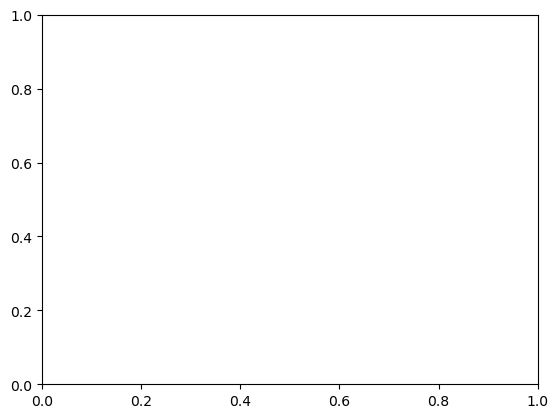

In [33]:
epochs = [i for i in range(1,1)]
plt.plot(epochs,training_history.history['accuracy'], color='red',label='Training Accuracy')
plt.show()

In [36]:
class_name = validation_set.class_names
class_name

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [37]:
test_set= tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    
)

Found 17572 files belonging to 38 classes.


In [38]:
y_pred = model.predict(test_set)
y_pred,y_pred.shape

550/550 ━━━━━━━━━━━━━━━━━━━━ 85s 153ms/step


(array([[9.3496519e-01, 4.9612310e-02, 9.5718424e-06, ..., 1.0217712e-07,
         5.0202267e-08, 7.3594156e-06],
        [8.9265096e-01, 7.3548257e-02, 1.0674216e-05, ..., 6.0621971e-08,
         3.5392753e-07, 1.1967559e-05],
        [9.9775535e-01, 2.9595656e-04, 7.8638379e-07, ..., 1.4322131e-10,
         2.1501073e-08, 3.8917983e-07],
        ...,
        [7.7725876e-05, 4.5344888e-09, 4.5483021e-06, ..., 3.0210496e-05,
         3.7009040e-06, 8.3142650e-01],
        [6.3009850e-07, 6.3950317e-14, 8.9515201e-10, ..., 1.0663229e-04,
         5.3889872e-11, 9.6755856e-01],
        [9.0147487e-06, 9.7005985e-09, 1.1326157e-06, ..., 4.3977252e-06,
         1.5182423e-05, 9.6479005e-01]], dtype=float32),
 (17572, 38))

In [39]:
predicted_categories = tf.argmax(y_pred,axis=1)

In [40]:
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [41]:
true_categories= tf.concat([y for x,y in test_set], axis=0)
true_categories

<tf.Tensor: shape=(17572, 38), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [42]:
Y_true = tf.argmax(true_categories,axis=1)
Y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [46]:
from sklearn.metrics import classification_report
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.75      0.81      0.78       504
                                 Apple___Black_rot       0.93      0.89      0.91       497
                          Apple___Cedar_apple_rust       0.90      0.76      0.83       440
                                   Apple___healthy       0.83      0.86      0.84       502
                               Blueberry___healthy       0.93      0.72      0.81       454
          Cherry_(including_sour)___Powdery_mildew       0.96      0.77      0.86       421
                 Cherry_(including_sour)___healthy       0.78      0.93      0.85       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.87      0.75      0.81       410
                       Corn_(maize)___Common_rust_       0.94      0.98      0.96       477
               Corn_(maize)___Northern_Leaf_Blight       0.80      0.88      0.

In [50]:
cn = sklearn.metrics.confusion_matrix(Y_true,predicted_categories)
cn.shape

(38, 38)

CONFUSION MATTX VISUALISATION

<Axes: >

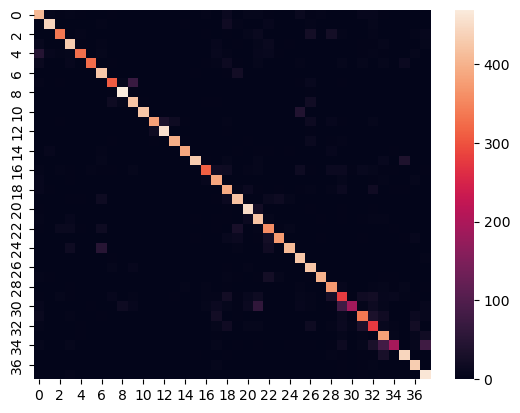

In [51]:
sns.heatmap(cn)